### Data

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
data = pd.read_csv("fraserDataWithRGDPPC.csv", 
                   index_col=[0,1],
                  parse_dates = True).dropna()
years = np.array(sorted(list(set(data.index.get_level_values("Year")))))
years = pd.date_range(years[0], years[-2], freq = "AS")
countries = sorted(list(set(data.index.get_level_values("ISO_Code"))))
index_names = list(data.index.names)
multi_index = pd.MultiIndex.from_product([countries, 
                                          years[:-1]], 
                                         names =data.index.names)
data = data.reindex(multi_index)
data

EFW  Size of Government  \
ISO_Code Year                                       
AGO      1970-01-01       NaN                 NaN   
         1971-01-01       NaN                 NaN   
         1972-01-01       NaN                 NaN   
         1973-01-01       NaN                 NaN   
         1974-01-01       NaN                 NaN   
...                       ...                 ...   
ZWE      2010-01-01  4.374917            6.514112   
         2011-01-01  4.843441            6.424630   
         2012-01-01  4.971192            6.670469   
         2013-01-01  5.246723            6.325105   
         2014-01-01  5.582478            6.433165   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      1970-01-01                             NaN          NaN   
         1971-01-01                             NaN          NaN   
         1972-01-01                             NaN          NaN   
         1973-01-01                             NaN          NaN   
         1974-01-01                             NaN          NaN   
...                                             ...          ...   
ZWE      2010-01-01                        3.826300     1.972000   
         2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      1970-01-01                               NaN         NaN   
         1971-01-01                               NaN         NaN   
         1972-01-01                               NaN         NaN   
         1973-01-01                               NaN         NaN   
         1974-01-01                               NaN         NaN   
...                                               ...         ...   
ZWE      2010-01-01                          4.907822    4.654352   
         2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   

                     RGDP Per Capita  
ISO_Code Year                         
AGO      1970-01-01              NaN  
         1971-01-01              NaN  
         1972-01-01              NaN  
         1973-01-01              NaN  
         1974-01-01              NaN  
...                              ...  
ZWE      2010-01-01           1404.0  
         2011-01-01           1515.0  
         2012-01-01           1604.0  
         2013-01-01           1604.0  
         2014-01-01           1594.0  

[6840 rows x 7 columns]

In [12]:
keys = list(data.keys())[1:]
df = data.copy()
df["RGDP Per Capita"] = data["RGDP Per Capita"].groupby("ISO_Code").pct_change()
df =df[keys].diff()
df = df.rename(columns={key:key.replace(" ", " ") for key in df}).dropna()
df

Size of Government  Legal System & Property Rights  \
ISO_Code Year                                                             
AGO      2007-01-01           -0.103686                        0.022720   
         2008-01-01            0.068152                        0.084915   
         2009-01-01            1.797574                       -0.031306   
         2010-01-01           -1.366275                        0.050092   
         2011-01-01            0.096683                       -0.087293   
...                                 ...                             ...   
ZWE      2010-01-01           -0.855503                        0.117071   
         2011-01-01           -0.089482                        0.117425   
         2012-01-01            0.245839                        0.069279   
         2013-01-01           -0.345364                       -0.437177   
         2014-01-01            0.108060                        0.039756   

                     Sound Money  Freedom to trade internationally  \
ISO_Code Year                                                        
AGO      2007-01-01     0.392129                         -0.043488   
         2008-01-01     0.579510                         -0.427486   
         2009-01-01     0.205423                          0.123869   
         2010-01-01     0.331967                          0.377986   
         2011-01-01     0.101526                          0.020767   
...                          ...                               ...   
ZWE      2010-01-01     1.024500                          0.041328   
         2011-01-01     2.137198                          0.458951   
         2012-01-01     1.269544                         -0.234468   
         2013-01-01     1.516788                          0.456781   
         2014-01-01     1.071268                          0.320035   

                     Regulation  RGDP Per Capita  
ISO_Code Year                                     
AGO      2007-01-01    0.218491         0.017840  
         2008-01-01   -0.302899        -0.084366  
         2009-01-01   -0.210128        -0.110907  
         2010-01-01    0.680722         0.009600  
         2011-01-01   -0.701467         0.004508  
...                         ...              ...  
ZWE      2010-01-01   -0.024469         0.017729  
         2011-01-01   -0.281474        -0.010157  
         2012-01-01   -0.711440        -0.020314  
         2013-01-01    0.186630        -0.058746  
         2014-01-01    0.139653        -0.006234  

[1808 rows x 6 columns]

In [9]:
pip install decorator==4.3 --user

Note: you may need to restart the kernel to use updated packages.


In [13]:
df.corr()

,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation,RGDP Per Capita
Size of Government,1.000000,0.056615,-0.013536,0.031969,0.052546,0.013708
Legal System & Property Rights,0.056615,1.000000,0.021813,0.104924,0.207265,0.068795
Sound Money,-0.013536,0.021813,1.000000,0.130231,0.033420,-0.031347
Freedom to trade internationally,0.031969,0.104924,0.130231,1.000000,0.070488,0.040761
Regulation,0.052546,0.207265,0.033420,0.070488,1.000000,0.124689
RGDP Per Capita,0.013708,0.068795,-0.031347,0.040761,0.124689,1.000000


### Partial Correlation

In [14]:
import statsmodels.api as sm

In [15]:
residuals = {}
for y_var in df.keys():
    X_vars = list(df.keys())
    X_vars.remove(y_var)
    X = df[X_vars]
    # Initial estimate should include constant
    #   This won't be the case we regress the errors
    X["Constant"] = 1
    # pass y_var as list for consistent structure
    y = df[[y_var]]
    model = sm.OLS(y, X)
    results = model.fit()
    residuals[y_var] = results.resid
residuals = pd.DataFrame(residuals)
residuals

Size of Government  Legal System & Property Rights  \
ISO_Code Year                                                             
AGO      2007-01-01           -0.114134                       -0.014037   
         2008-01-01            0.097522                        0.188195   
         2009-01-01            1.806662                       -0.041575   
         2010-01-01           -1.415532                       -0.061361   
         2011-01-01            0.132866                        0.037261   
...                                 ...                             ...   
ZWE      2010-01-01           -0.852219                        0.141471   
         2011-01-01           -0.068811                        0.131042   
         2012-01-01            0.299726                        0.211703   
         2013-01-01           -0.324418                       -0.489596   
         2014-01-01            0.100074                       -0.016722   

                     Sound Money  Freedom to trade internationally  \
ISO_Code Year                                                        
AGO      2007-01-01     0.342342                         -0.086190   
         2008-01-01     0.599599                         -0.456258   
         2009-01-01     0.149415                          0.100800   
         2010-01-01     0.146716                          0.346911   
         2011-01-01     0.082395                          0.051776   
...                          ...                               ...   
ZWE      2010-01-01     0.950131                         -0.037762   
         2011-01-01     2.003512                          0.283006   
         2012-01-01     1.294684                         -0.317963   
         2013-01-01     1.346889                          0.381682   
         2014-01-01     0.952280                          0.220011   

                     Regulation  RGDP Per Capita  
ISO_Code Year                                     
AGO      2007-01-01    0.165175         0.021755  
         2008-01-01   -0.307282        -0.065414  
         2009-01-01   -0.247416        -0.099753  
         2010-01-01    0.651456         0.000155  
         2011-01-01   -0.729087         0.028820  
...                         ...              ...  
ZWE      2010-01-01   -0.087337         0.029747  
         2011-01-01   -0.390606         0.010584  
         2012-01-01   -0.773102         0.010629  
         2013-01-01    0.235388        -0.047080  
         2014-01-01    0.062467         0.000473  

[1808 rows x 6 columns]

In [16]:
residuals.corr()[residuals.corr().abs() < 1].mul(-1).fillna(1).round(2)

,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation,RGDP Per Capita
Size of Government,1.00,0.04,-0.02,0.03,0.04,0.00
Legal System & Property Rights,0.04,1.00,0.01,0.09,0.19,0.04
Sound Money,-0.02,0.01,1.00,0.13,0.03,-0.04
Freedom to trade internationally,0.03,0.09,0.13,1.00,0.04,0.03
Regulation,0.04,0.19,0.03,0.04,1.00,0.11
RGDP Per Capita,0.00,0.04,-0.04,0.03,0.11,1.00


In [17]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [18]:
import pingouin

In [19]:
df.pcorr().round(2)

,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation,RGDP Per Capita
Size of Government,1.00,0.04,-0.02,0.03,0.04,0.00
Legal System & Property Rights,0.04,1.00,0.01,0.09,0.19,0.04
Sound Money,-0.02,0.01,1.00,0.13,0.03,-0.04
Freedom to trade internationally,0.03,0.09,0.13,1.00,0.04,0.03
Regulation,0.04,0.19,0.03,0.04,1.00,0.11
RGDP Per Capita,0.00,0.04,-0.04,0.03,0.11,1.00


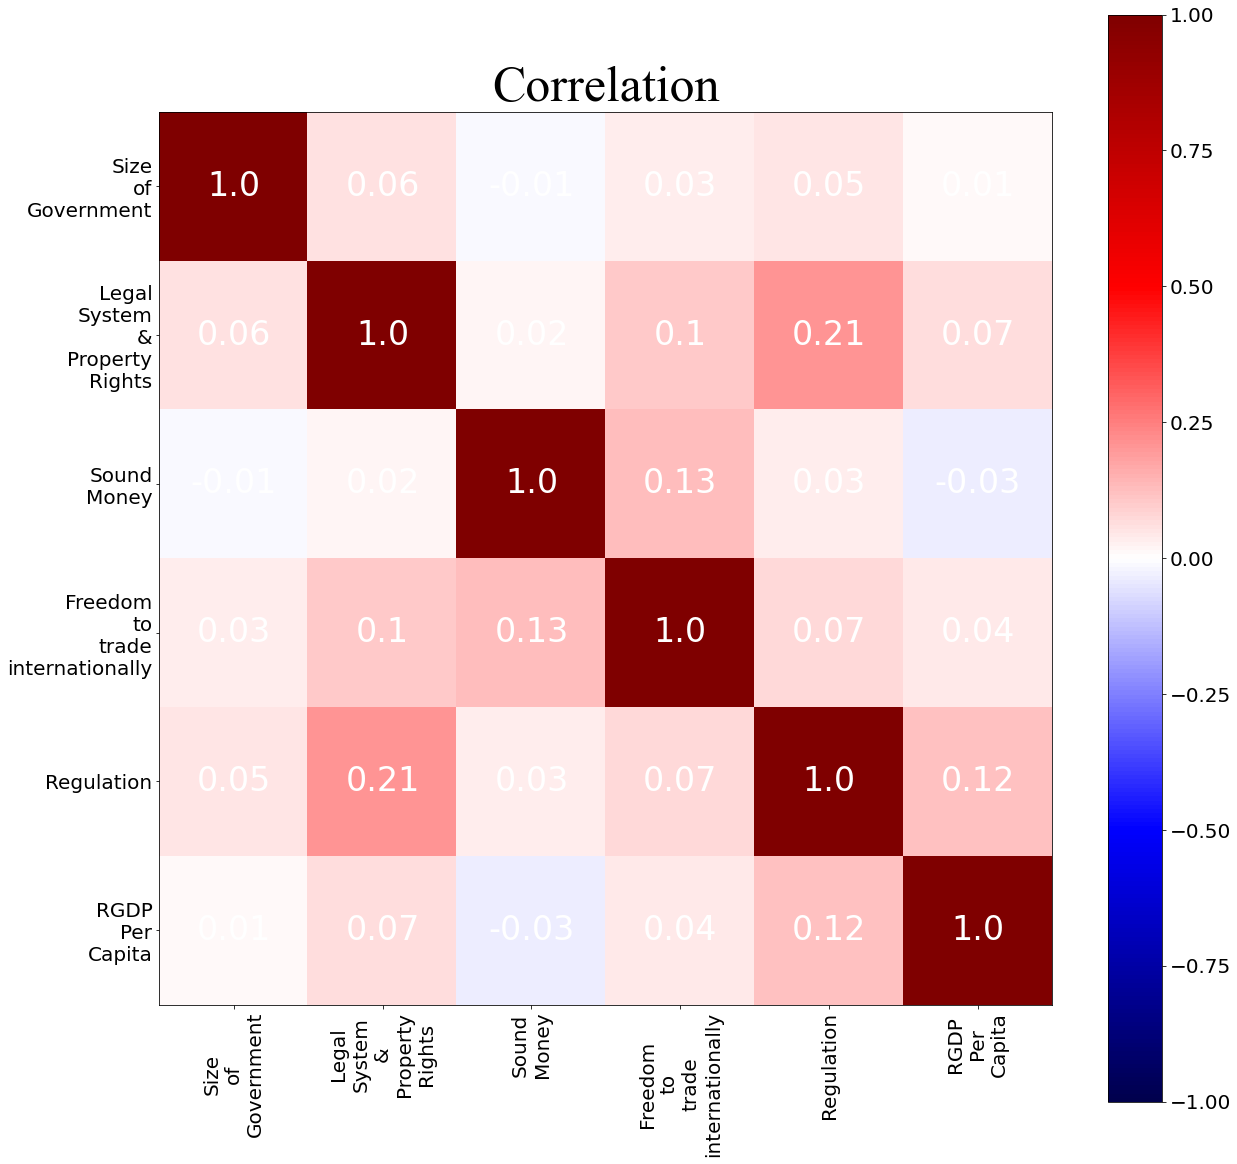

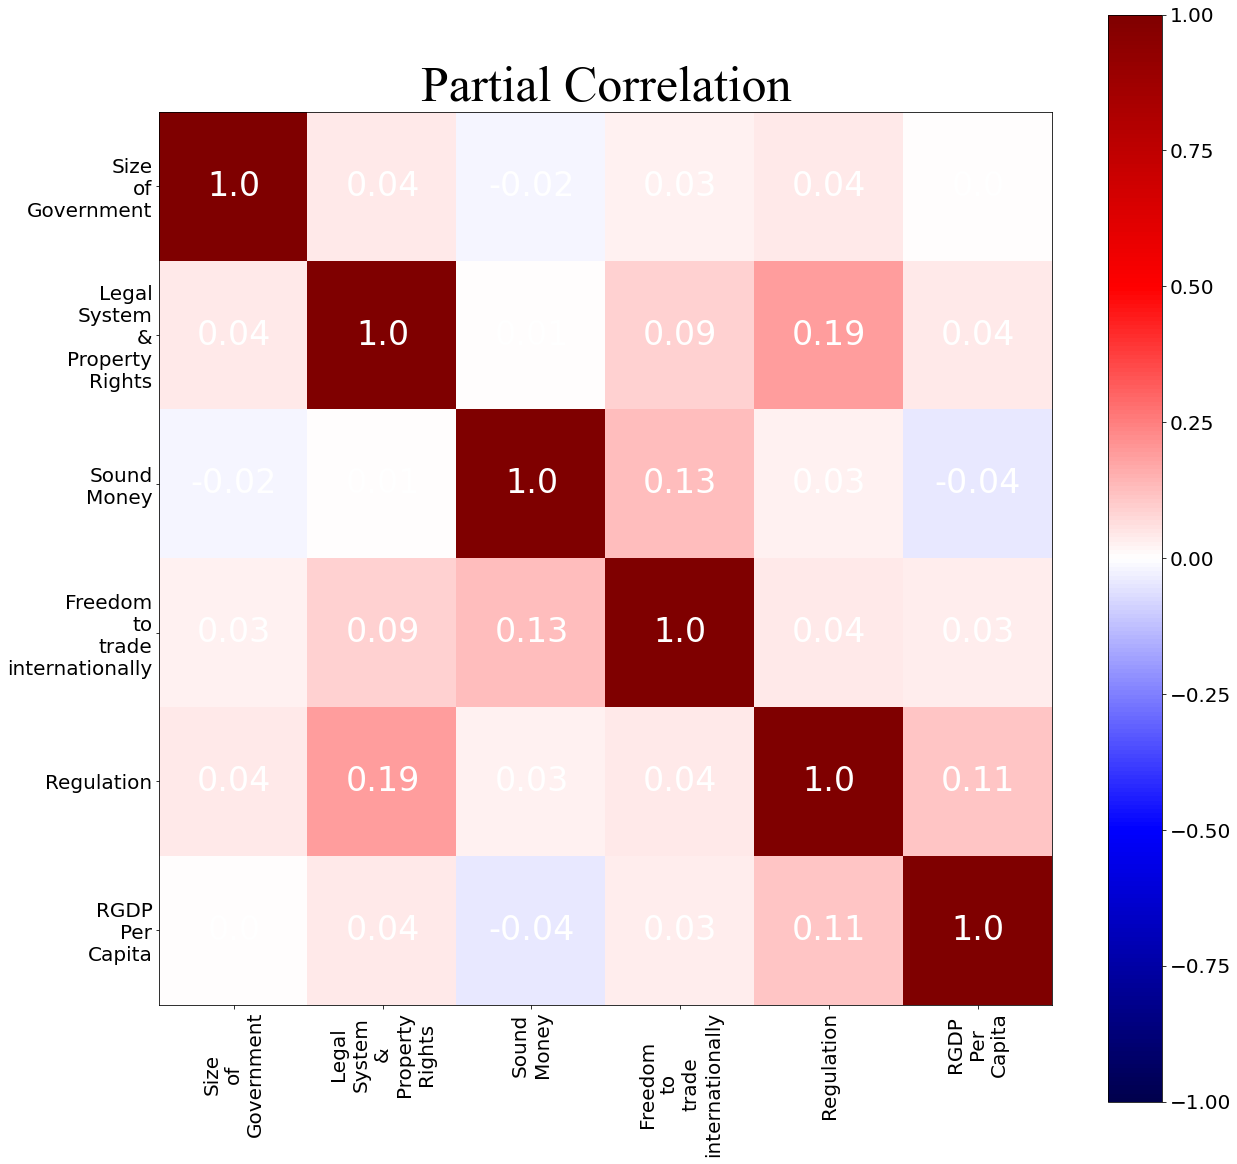

In [21]:
from datlib.plots import *
corr_matrix_heatmap(df.corr(), 
                    save_fig = False, 
                    pp = None, 
                    title = "Correlation")
corr_matrix_heatmap(df.pcorr(), 
                    save_fig = False, 
                    pp = None, 
                    title = "Partial Correlation")

In [22]:
pcorr_pvalues = {}
for y, Y in residuals.items():
    pcorr_pvalues[y] = {}
    for x, X in residuals.items():
        if x != y:
            pcorr_pvalues[y][x] = sm.OLS(Y,X).fit().pvalues[x]
        
        else:
            pcorr_pvalues[y][x] = np.NaN
pd.DataFrame(pcorr_pvalues).round(2)

,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation,RGDP Per Capita
Size of Government,NaN,0.06,0.42,0.26,0.09,0.87
Legal System & Property Rights,0.06,NaN,0.80,0.00,0.00,0.08
Sound Money,0.42,0.80,NaN,0.00,0.23,0.09
Freedom to trade internationally,0.26,0.00,0.00,NaN,0.08,0.16
Regulation,0.09,0.00,0.23,0.08,NaN,0.00
RGDP Per Capita,0.87,0.08,0.09,0.16,0.00,NaN


# 1.
Create a graphical skeleton like the one created above using the Economic Freedom of the World Index and Real GDP.

In [23]:
undirected_graph = {key:[] for key in df.keys()}
for x in undirected_graph:
    remaining_vars = [y for y in df.keys() if y != x]
    for y in remaining_vars:
        undirected_graph[x].append(y)

undirected_graph

{'Size of Government': ['Legal System & Property Rights',
  'Sound Money',
  'Freedom to trade internationally',
  'Regulation',
  'RGDP Per Capita'],
 'Legal System & Property Rights': ['Size of Government',
  'Sound Money',
  'Freedom to trade internationally',
  'Regulation',
  'RGDP Per Capita'],
 'Sound Money': ['Size of Government',
  'Legal System & Property Rights',
  'Freedom to trade internationally',
  'Regulation',
  'RGDP Per Capita'],
 'Freedom to trade internationally': ['Size of Government',
  'Legal System & Property Rights',
  'Sound Money',
  'Regulation',
  'RGDP Per Capita'],
 'Regulation': ['Size of Government',
  'Legal System & Property Rights',
  'Sound Money',
  'Freedom to trade internationally',
  'RGDP Per Capita'],
 'RGDP Per Capita': ['Size of Government',
  'Legal System & Property Rights',
  'Sound Money',
  'Freedom to trade internationally',
  'Regulation']}

In [24]:
import copy

In [25]:
p_val = .01
def build_skeleton(df, undirected_graph):    
    def check_remaining_controls(control_vars, undirected_graph, x, y, controls_used) :
        for c_var in control_vars:
            # set c_used every time use cycle through a new control
            #  the program will then iterate through remaining controls
            #  until statistical significance is broken
            c_used = copy.copy(controls_used)
            if y in undirected_graph[x]:

                c_used.append(c_var)
                test = df.partial_corr(x = x, y = y, covar=c_used,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val: 

                    undirected_graph[x].remove(y)
                    #breakout of the for 
                    break
                else:
                    remaining_controls = copy.copy(control_vars)
                    remaining_controls.remove(c_var)
                    # recursive function that iterates through remaining variables 
                    #  uses them as controls statistical significance holds without them,
                    #  otherwise break
                    check_remaining_controls(remaining_controls, undirected_graph, x, y, c_used)
                
    for x in df.keys():
        ys = undirected_graph[x]
        for y in df.keys():
            if x != y:
            # first check for correlation with no controls
                test = df.partial_corr(x = x, 
                                       y = y, 
                                       covar = None,
                                       method = "pearson") 
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
            # if correlated check for deseparation controlling for other variables
                else:
                    control_vars = [z for z in df.keys() if z != y and z != x]
                    check_remaining_controls(control_vars, undirected_graph, x, y, [])
    return undirected_graph

undirected_graph = build_skeleton(df, undirected_graph)                                   
undirected_graph

{'Size of Government': [],
 'Legal System & Property Rights': ['Freedom to trade internationally',
  'Regulation'],
 'Sound Money': ['Freedom to trade internationally'],
 'Freedom to trade internationally': ['Legal System & Property Rights',
  'Sound Money'],
 'Regulation': ['Legal System & Property Rights', 'RGDP Per Capita'],
 'RGDP Per Capita': ['Regulation']}

In [26]:
import matplotlib.pyplot as plt
import networkx as nx

In [27]:
def graph_DAG(undirected_graph, df, title = "DAG Structure"):
    
    # generate partial correlation matrix to draw values from
    # for graph edges
    pcorr_matrix = df.pcorr()
    graph = nx.Graph()
    edges = []
    edge_labels = {}
    for key in undirected_graph:
        for key2 in undirected_graph[key]:
            if (key2, key) not in edges:
                edge = (key.replace(" ","\n"), key2[0].replace(" ","\n"))
                edges.append(edge)
                # edge label is partial correlation between
                # key and key2
                edge_labels[edge] = str(round(pcorr_matrix.loc[key][key2],2))

    # edge format: ("i", "j") --> from node i to node j
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, 
                     node_size = 1000,
                     with_labels=True,  arrows=False,
                     font_size = 20, alpha = 1,
                     font_color = "white",
                     ax = ax)
    nx.draw_networkx_edge_labels(graph,pos,
                                 edge_labels=edge_labels,
                                 font_color='green',
                                 font_size=20)
    plt.axis("off")
    plt.savefig("g1.png", format="PNG")
    plt.show()

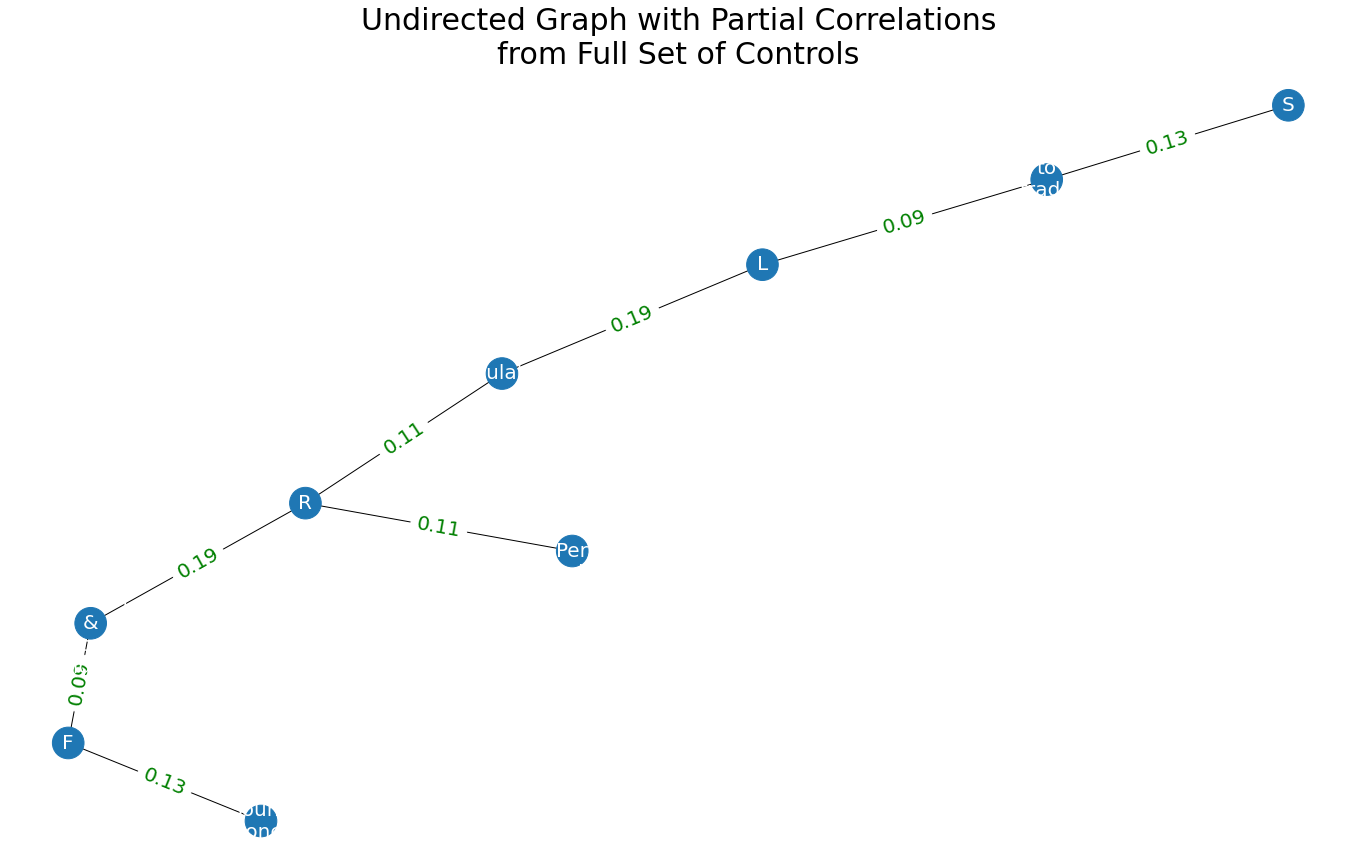

In [28]:
graph_DAG(undirected_graph, df, title = "Undirected Graph with Partial Correlations\nfrom Full Set of Controls")

# 2.
Create a directed acyclic graph using the same data. Include partial correlations as explained in the D-Separation section.

In [30]:
from pgmpy.estimators import PC
c = PC(df)
max_cond_vars = len(df.keys()) - 2


model = c.estimate(return_type = "dag",variant= "parallel",#"orig", "stable"
                   significance_level = p_val, 
                   max_cond_vars = max_cond_vars, ci_test = "pearsonr")
edges = model.edges()

  0%|          | 0/4 [00:00<?, ?it/s]

OutEdgeView([('Legal System & Property Rights', 'Freedom to trade internationally'), ('Sound Money', 'Freedom to trade internationally'), ('Regulation', 'Legal System & Property Rights'), ('RGDP Per Capita', 'Regulation')])

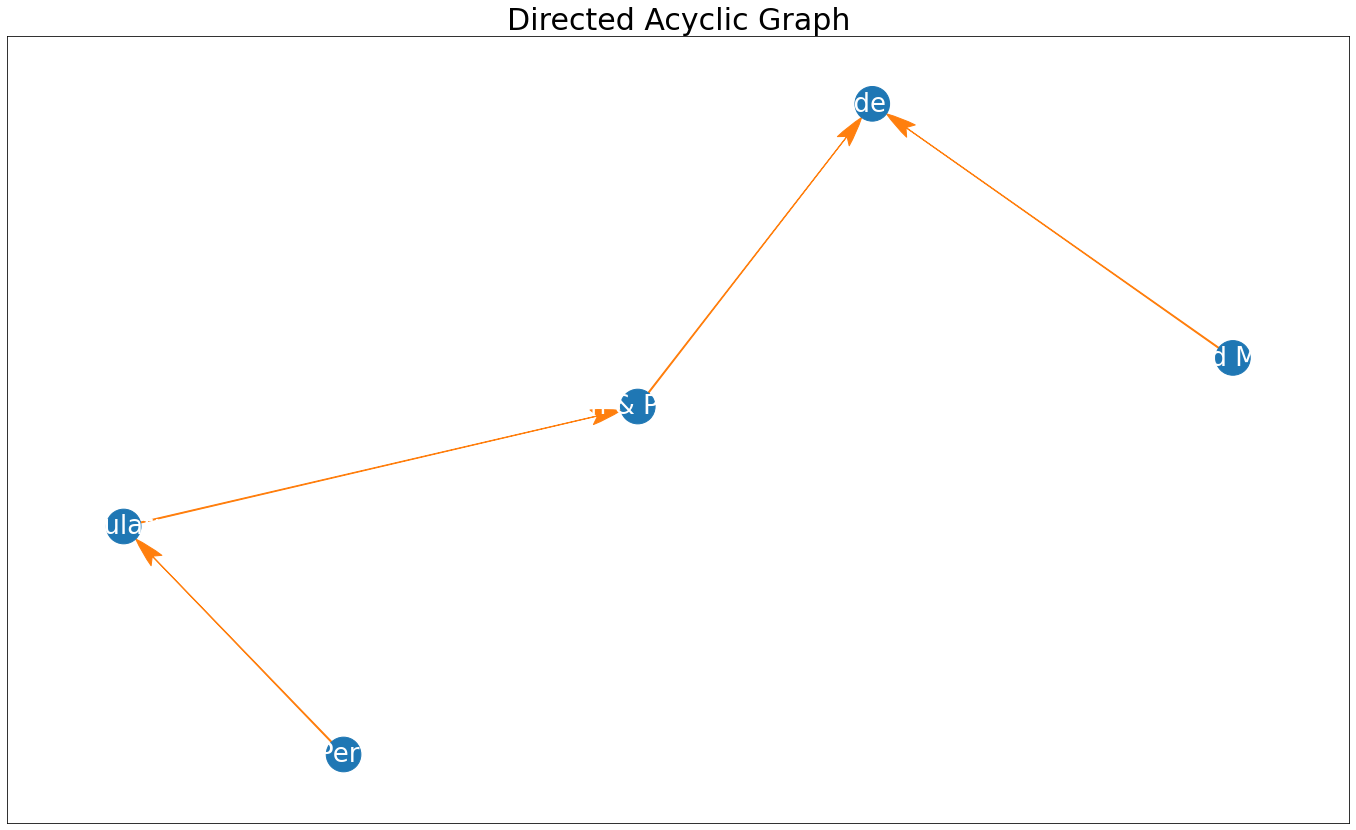

In [31]:
from matplotlib.patches import ArrowStyle

def graph_DAG(edges, df, title = ""):
    graph = nx.DiGraph()
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 1200,
                     with_labels=True,  arrows=True,
                     font_color = "white",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"), ax = ax)

graph_DAG(edges, df, title = "Directed Acyclic Graph")
edges

keep control: Sound Money
('Legal System & Property Rights', 'Freedom to trade internationally') ['Sound Money']
keep control: Legal System & Property Rights
('Sound Money', 'Freedom to trade internationally') ['Legal System & Property Rights']
('Regulation', 'Legal System & Property Rights') []
('RGDP Per Capita', 'Regulation') []


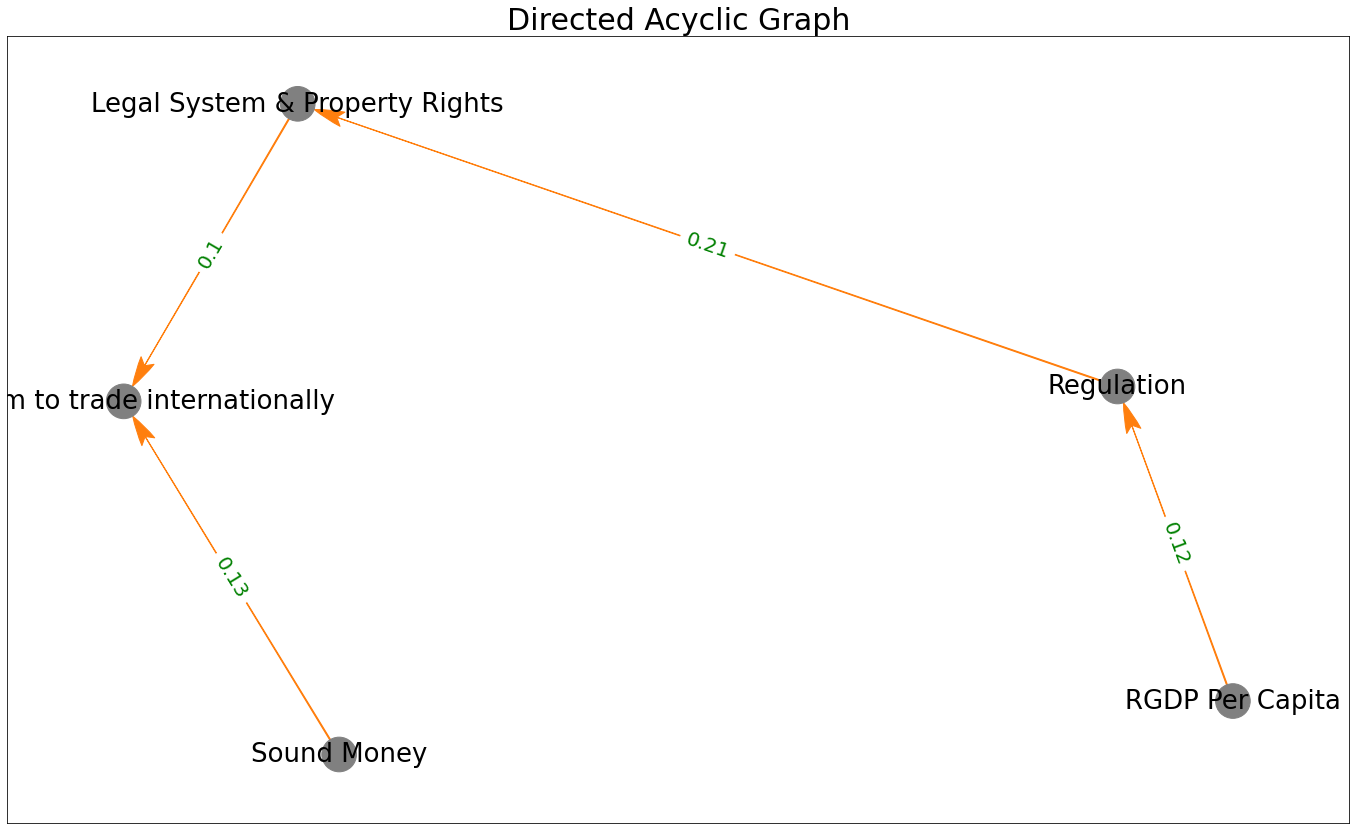

In [32]:
def graph_DAG(edges, df, title = ""):
    graph = nx.DiGraph()
    edge_labels = {}
    ############ Add ############
    for edge in edges:
        controls = [key for key in df.keys() if key not in edge]
        controls = list(set(controls))
        keep_controls = []
        for control in controls:
            control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0] ]
            if (control, edge[1]) in control_edges:
                print("keep control:", control)
                keep_controls.append(control)                
        print(edge, keep_controls)
        pcorr = df[[edge[0], edge[1]]+keep_controls].pcorr()
#         corr_matrix_heatmap(pcorr, save_fig = False, pp = None, title = "Partial Correlation")
        edge_labels[edge] = str(round(pcorr[edge[0]].loc[edge[1]],2))
    graph.add_edges_from(edges)
    color_map = ["grey" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 1200,
                     with_labels=True,  arrows=True,
                     # turn text black for larger variable names in homework
                     font_color = "k",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"), ax = ax)
    ############ Add ############
    nx.draw_networkx_edge_labels(graph,pos,
                                edge_labels=edge_labels,
                                font_color='green',
                                font_size=20)

graph_DAG(edges, df, title = "Directed Acyclic Graph")

keep control: Sound Money
('Legal System & Property Rights', 'Freedom to trade internationally') ['Sound Money']
keep control: Legal System & Property Rights
('Sound Money', 'Freedom to trade internationally') ['Legal System & Property Rights']
('Regulation', 'Legal System & Property Rights') []
('RGDP Per Capita', 'Regulation') []


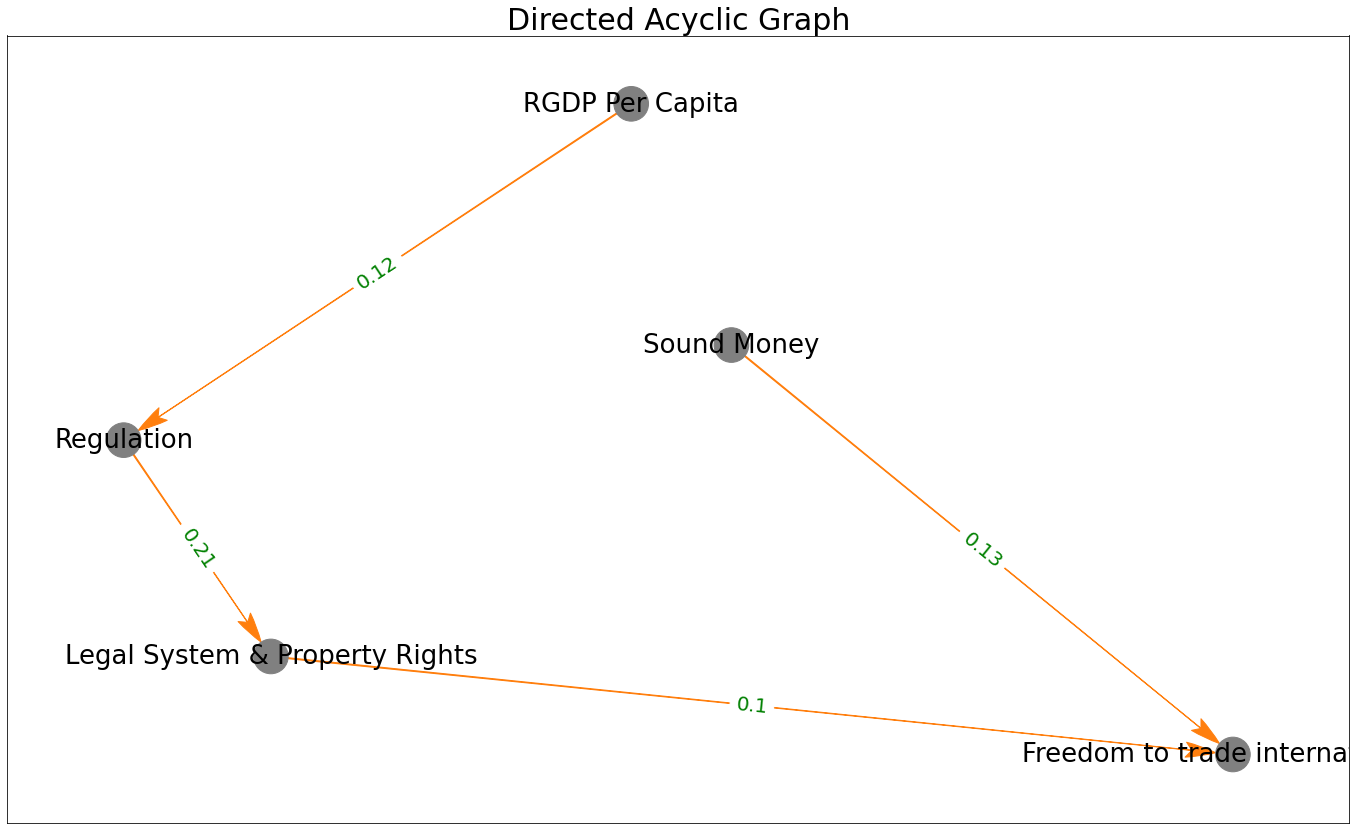

In [34]:
def graph_DAG(edges, df, title = ""):
    graph = nx.DiGraph()
    edge_labels = {}
    ############ Add ############
    for edge in edges:
        controls = [key for key in df.keys() if key not in edge]
        controls = list(set(controls))
        keep_controls = []
        for control in controls:
            control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0] ]
            if (control, edge[1]) in control_edges:
                print("keep control:", control)
                keep_controls.append(control)                
        print(edge, keep_controls)
        pcorr = df[[edge[0], edge[1]]+keep_controls].pcorr()
#         corr_matrix_heatmap(pcorr, save_fig = False, pp = None, title = "Partial Correlation")
        edge_labels[edge] = str(round(pcorr[edge[0]].loc[edge[1]],2))
    graph.add_edges_from(edges)
    color_map = ["grey" for g in graph]
    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 1200,
                     with_labels=True,  arrows=True,
                     # turn text black for larger variable names in homework
                     font_color = "k",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"), ax = ax)
    ############ Add ############
    nx.draw_networkx_edge_labels(graph,pos,
                                edge_labels=edge_labels,
                                font_color='green',
                                font_size=20)

graph_DAG(edges, df, title = "Directed Acyclic Graph")